In [4]:
pip install dash pandas plotly

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 22.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 101.7/101.7 kB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 228.0/228.0 kB 13.9 MB/s eta 0:00:00
  Attempting uninstall: Werkzeug
    Found existing installation: Werkzeug 3.1.3
    Uninstalling Werkzeug-3.1.3:
      Successfully uninstalled Werkzeug-3.1.3
  Attempting uninstall: Flask
    Found existing installation: Flask 3.1.0
    Uninstalling Flask-3.1.0:
      Successfully uninstalled Flask-3.1.0


In [5]:
import dash
from dash import dcc, html
import plotly.express as px
import plotly.graph_objects as go
import pandas as pd
from dash.dependencies import Input, Output

# Charger les données
df = pd.read_csv('Frequencies_of_NEWS1_Responses_by_Age_Group.csv')

# Initialiser l'application Dash
app = dash.Dash(__name__)

# Créer une palette de couleurs personnalisée
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2']

# Définir la mise en page du dashboard
app.layout = html.Div([
    html.H1('Analyse des Modes d\'Information par Tranche d\'Âge',
            style={'textAlign': 'center', 'color': '#2c3e50', 'marginBottom': 30}),

    html.Div([
        # Premier rang avec sélecteur et graphique radar
        html.Div([
            html.Label('Sélectionner une tranche d\'âge:'),
            dcc.Dropdown(
                id='age-group-selector',
                options=[{'label': age, 'value': age} for age in df['Age_Group'].unique()],
                value=df['Age_Group'].iloc[0],
                style={'marginBottom': 20}
            ),
            dcc.Graph(id='radar-chart')
        ], style={'width': '48%', 'display': 'inline-block'}),

        # Graphique à barres
        html.Div([
            dcc.Graph(id='bar-chart')
        ], style={'width': '48%', 'display': 'inline-block', 'marginLeft': '4%'})
    ]),

    # Deuxième rang avec heatmap
    html.Div([
        dcc.Graph(id='heatmap')
    ], style={'marginTop': 30})
])

# Callback pour le graphique radar
@app.callback(
    Output('radar-chart', 'figure'),
    Input('age-group-selector', 'value')
)
def update_radar(selected_age):
    # Sélectionner les colonnes pour le radar
    cols = ['Radio_Podcast', 'TV', 'Internet_Site', 'Search_Engine',
            'News_Portal', 'Social_Media', 'Video_Platform']

    # Filtrer les données pour l'âge sélectionné
    df_filtered = df[df['Age_Group'] == selected_age]

    # Créer le graphique radar
    fig = go.Figure()

    fig.add_trace(go.Scatterpolar(
        r=df_filtered[cols].iloc[0],
        theta=cols,
        fill='toself',
        name=selected_age
    ))

    fig.update_layout(
        polar=dict(
            radialaxis=dict(
                visible=True,
                range=[0, 100]
            )),
        showlegend=True,
        title=f'Utilisation des médias - {selected_age}'
    )

    return fig

# Callback pour le graphique à barres
@app.callback(
    Output('bar-chart', 'figure'),
    Input('age-group-selector', 'value')
)
def update_bar_chart(selected_age):
    cols = ['Radio_Podcast', 'TV', 'Internet_Site', 'Search_Engine',
            'News_Portal', 'Social_Media', 'Video_Platform']

    # Créer le graphique à barres
    fig = go.Figure()

    for age in df['Age_Group'].unique():
        age_data = df[df['Age_Group'] == age]
        fig.add_trace(go.Bar(
            name=age,
            x=cols,
            y=age_data[cols].iloc[0],
            marker_color=colors[list(df['Age_Group'].unique()).index(age) % len(colors)]
        ))

    fig.update_layout(
        barmode='group',
        title='Comparaison des modes d\'information par tranche d\'âge',
        xaxis_title='Mode d\'information',
        yaxis_title='Pourcentage d\'utilisation (%)',
        legend_title='Tranche d\'âge'
    )

    return fig

# Callback pour la heatmap
@app.callback(
    Output('heatmap', 'figure'),
    Input('age-group-selector', 'value')
)
def update_heatmap(_):
    cols = ['Radio_Podcast', 'TV', 'Internet_Site', 'Search_Engine',
            'News_Portal', 'Social_Media', 'Video_Platform']

    # Créer la heatmap
    fig = px.imshow(
        df[cols],
        labels=dict(x='Mode d\'information', y='Tranche d\'âge', color='Pourcentage'),
        x=cols,
        y=df['Age_Group'],
        color_continuous_scale='Viridis'
    )

    fig.update_layout(
        title='Heatmap des modes d\'information par tranche d\'âge',
        xaxis_title='Mode d\'information',
        yaxis_title='Tranche d\'âge'
    )

    return fig

# Lancer le serveur
if __name__ == '__main__':
    app.run_server(debug=True)

<IPython.core.display.Javascript object>

In [6]:
import pandas as pd
from dash import Dash, dcc, html
from dash.dependencies import Input, Output
import plotly.graph_objects as go

# Charger les données
df = pd.read_csv('Frequencies_of_NEWS1_Responses_by_Age_Group.csv')

# Créer l'application Dash
app = Dash(__name__)

# Définir les colonnes pour le graphique
cols = ['Radio_Podcast', 'TV', 'Internet_Site', 'Search_Engine',
        'News_Portal', 'Social_Media', 'Video_Platform']

# Labels en français
labels = {
    'Radio_Podcast': 'Radio / Podcast',
    'TV': 'Télévision',
    'Internet_Site': 'Sites Internet',
    'Search_Engine': 'Moteur de recherche',
    'News_Portal': 'Portail d\'actualités',
    'Social_Media': 'Réseaux sociaux',
    'Video_Platform': 'Plateformes vidéo'
}

app.layout = html.Div([
    html.H1('Utilisation des Médias par Tranche d\'Âge',
            style={'textAlign': 'center', 'fontFamily': 'Arial', 'color': '#2c3e50', 'marginBottom': '30px'}),

    html.Div([
        html.Label('Sélectionner une tranche d\'âge:',
                  style={'fontSize': '18px', 'marginRight': '15px'}),
        dcc.Dropdown(
            id='age-selector',
            options=[{'label': age, 'value': age} for age in df['Age_Group'].unique()],
            value=df['Age_Group'].iloc[0],
            style={'width': '300px'}
        )
    ], style={'textAlign': 'center', 'marginBottom': '30px'}),

    html.Div([
        dcc.Graph(id='bar-chart',
                 style={'height': '600px'})
    ], style={'margin': 'auto', 'width': '90%'})
], style={'padding': '20px'})

@app.callback(
    Output('bar-chart', 'figure'),
    Input('age-selector', 'value')
)
def update_graph(selected_age):
    df_filtered = df[df['Age_Group'] == selected_age]

    fig = go.Figure()

    fig.add_trace(go.Bar(
        x=df_filtered[cols].iloc[0],
        y=[labels[col] for col in cols],
        orientation='h',
        marker=dict(
            color='#2980b9',
            line=dict(color='#2c3e50', width=1)
        )
    ))

    # Créer une liste de valeurs pour les ticks de l'axe x (de 0 à 0.5 par pas de 0.1)
    xticks = [i/10 for i in range(0, 6)]

    fig.update_layout(
        title=dict(
            text=f'Utilisation des médias - {selected_age}',
            font=dict(size=24),
            y=0.95
        ),
        xaxis=dict(
            title='Fréquence d\'utilisation quotidienne',
            range=[0, 0.5],
            tickvals=xticks,
            ticktext=[f'{x:.1f}' for x in xticks],
            gridcolor='#ecf0f1',
            dtick=0.1
        ),
        yaxis=dict(
            title='',
            autorange="reversed"
        ),
        plot_bgcolor='white',
        paper_bgcolor='white',
        margin=dict(l=20, r=20, t=80, b=20),
        showlegend=False
    )

    # Ajouter des lignes de grille verticales plus fines
    fig.update_xaxes(showgrid=True, gridwidth=1, gridcolor='#ecf0f1')
    fig.update_yaxes(showgrid=False)

    return fig

if __name__ == '__main__':
    app.run_server(debug=True)

<IPython.core.display.Javascript object>

In [ ]:
# que 1900 données pas 3000 le code en dessous

In [ ]:
# Les fréquences du graphique a gauche correspondent à la fréquence des gens qui utilisent au moins une fois par jour tel ou tel support pour chaque tranche d'age

In [7]:
import pandas as pd
from dash import Dash, dcc, html
from dash.dependencies import Input, Output
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Charger les données
df1 = pd.read_csv('Frequencies_of_NEWS1_Responses_by_Age_Group.csv')
df2 = pd.read_csv('age_group_main_info_mode_frequencies.csv')

# Créer l'application Dash
app = Dash(__name__)

# Définir les colonnes pour le premier graphique
cols = ['Radio_Podcast', 'TV', 'Internet_Site', 'Search_Engine',
        'News_Portal', 'Social_Media', 'Video_Platform']

labels = {
    'Radio_Podcast': 'Radio / Podcast',
    'TV': 'Télévision',
    'Internet_Site': 'Sites Internet',
    'Search_Engine': 'Moteur de recherche',
    'News_Portal': 'Portail d\'actualités',
    'Social_Media': 'Réseaux sociaux',
    'Video_Platform': 'Plateformes vidéo'
}

# Définir une palette de couleurs
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f']

app.layout = html.Div([
    html.H1('Analyse des Modes d\'Information par Tranche d\'Âge',
            style={'textAlign': 'center', 'fontFamily': 'Arial', 'color': '#2c3e50', 'marginBottom': '30px'}),

    html.Div([
        html.Div([
            html.H2('Fréquence d\'utilisation par support',
                    style={'textAlign': 'center', 'color': '#2c3e50'}),
            html.Label('Sélectionner une tranche d\'âge:',
                      style={'fontSize': '16px', 'marginRight': '15px'}),
            dcc.Dropdown(
                id='age-selector',
                options=[{'label': age, 'value': age} for age in df1['Age_Group'].unique()],
                value=df1['Age_Group'].iloc[0],
                style={'width': '300px'}
            ),
            dcc.Graph(id='bar-chart')
        ], style={'width': '48%', 'display': 'inline-block', 'verticalAlign': 'top'}),

        html.Div([
            html.H2('Vue d\'ensemble des modes d\'information',
                    style={'textAlign': 'center', 'color': '#2c3e50'}),
            dcc.Graph(id='grouped-bars')
        ], style={'width': '48%', 'display': 'inline-block', 'verticalAlign': 'top'})
    ], style={'display': 'flex', 'justifyContent': 'space-between', 'margin': '20px'}),
], style={'padding': '20px'})

@app.callback(
    Output('bar-chart', 'figure'),
    Input('age-selector', 'value')
)
def update_bar_chart(selected_age):
    df_filtered = df1[df1['Age_Group'] == selected_age]

    fig = go.Figure()

    fig.add_trace(go.Bar(
        x=df_filtered[cols].iloc[0],
        y=[labels[col] for col in cols],
        orientation='h',
        marker=dict(
            color='#2980b9',
            line=dict(color='#2c3e50', width=1)
        )
    ))

    xticks = [i/10 for i in range(0, 6)]

    fig.update_layout(
        xaxis=dict(
            title='Fréquence d\'utilisation quotidienne',
            range=[0, 0.5],
            tickvals=xticks,
            ticktext=[f'{x:.1f}' for x in xticks],
            gridcolor='#ecf0f1',
            dtick=0.1
        ),
        yaxis=dict(
            title='',
            autorange="reversed"
        ),
        plot_bgcolor='white',
        paper_bgcolor='white',
        margin=dict(l=20, r=20, t=20, b=20),
        showlegend=False,
        height=500
    )

    fig.update_xaxes(showgrid=True, gridwidth=1, gridcolor='#ecf0f1')
    fig.update_yaxes(showgrid=False)

    return fig

@app.callback(
    Output('grouped-bars', 'figure'),
    Input('age-selector', 'value')
)
def update_grouped_bars(_):
    # Créer le graphique à barres groupées
    fig = go.Figure()

    # Ajouter les barres pour chaque média
    for i, col in enumerate(df2.columns[1:]):  # Skip Age_Group column
        fig.add_trace(go.Bar(
            name=col,
            x=df2['Age_Group'],
            y=df2[col],
            marker_color=colors[i % len(colors)]
        ))

    fig.update_layout(
        barmode='group',
        xaxis=dict(
            title='Tranche d\'âge',
            tickangle=0,
            showgrid=False
        ),
        yaxis=dict(
            title='Fréquence d\'utilisation quotidienne',
            range=[0, 0.5],
            gridcolor='#ecf0f1',
            dtick=0.1
        ),
        plot_bgcolor='white',
        paper_bgcolor='white',
        margin=dict(l=20, r=20, t=20, b=20),
        legend=dict(
            orientation='h',
            yanchor='bottom',
            y=1.02,
            xanchor='right',
            x=1
        ),
        height=500
    )

    fig.update_xaxes(showgrid=False)
    fig.update_yaxes(showgrid=True, gridwidth=1, gridcolor='#ecf0f1')

    return fig

if __name__ == '__main__':
    app.run_server(debug=True)

<IPython.core.display.Javascript object>

Nombre de lignes après chargement: 3346

Colonnes disponibles: ['Unnamed: 0', 'RECORD', 'UUID', 'CIBLE', 'SOURCE_BASE_R1', 'POIDS03', 'INTER', 'CONTACT', 'RS1_R', 'RS2C_RECODE_AG_R', 'RS3_R', 'RS4_R', 'CSPIND_R', 'RS5_R', 'UDA9_R', 'UDA5_R', 'DPT_DOM_R', 'CC_R', 'RS7_R', 'RS14_R', 'ILLECTRO_R', 'RS15_R', 'FREQ_INTERNET_R', 'RS16_R_1', 'RS16_R_2', 'RS16_R_3', 'RS16_R_4', 'RS16_R_5', 'RS16_R_6', 'RS16_R_7', 'RS16_R_8', 'RS16_R_9', 'RS16_R_10', 'RS16_R_11', 'RS16_R_12', 'INT1_R', 'INT2_R_1', 'INT2_R_2', 'INT2_R_3', 'INT2_R_4', 'INT2_R_5', 'INT2_R_6', 'INT2_R_7', 'INT2_R_8', 'INT2_R_9', 'INT2_R_10', 'INT2_R_11', 'INT2_R_12', 'VERSION_QUESTIO_R', 'INT3_R_1', 'INT3_R_2', 'INT3_R_3', 'INT3_R_4', 'INT3_R_5', 'INT3_R_6', 'INT3_R_7', 'INT3_R_8', 'INT3_R_9', 'INT3_R_10', 'INT3_R_11', 'INT3_R_12', 'MOTIV_R_1', 'MOTIV_R_2', 'MOTIV_R_3', 'MOTIV_R_4', 'MOTIV_R_5', 'MOTIV_R_6', 'MOTIV_R_7', 'MOTIV_R_8', 'MOTIV_R_9', 'MOTIV_R_10', 'MOTIV_R_11', 'MOTIV_R_12', 'MOTIV_R_13', 'MOTIV_R_14', 'NEWS1_R_1', 'NE

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning:

'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.




Rapport de classification :

                                                                                                                         precision    recall  f1-score   support

                                                    En consultant des plateformes de vidéo en ligne (Youtube,Twitch, …)       0.00      0.00      0.00        22
                                        En consultant des réseaux sociaux (Facebook, X (Twitter), TikTok, LinkedIn ...)       0.23      0.49      0.32        80
               En lisant un journal ou un magazine, quel que soit le support (papier, smartphone, ordinateur, tablette)       0.00      0.00      0.00        57
   En regardant la télévision en direct ou en replay quel que soit le support (poste de télévision, ordinateur, tablett       0.44      0.86      0.58       252
                                                                En utilisant un moteur de recherche (Google, Safari, …)       0.00      0.00      0.00        83
   

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:2739: UserWarning:

X does not have valid feature names, but LogisticRegression was fitted with feature names

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:2739: UserWarni

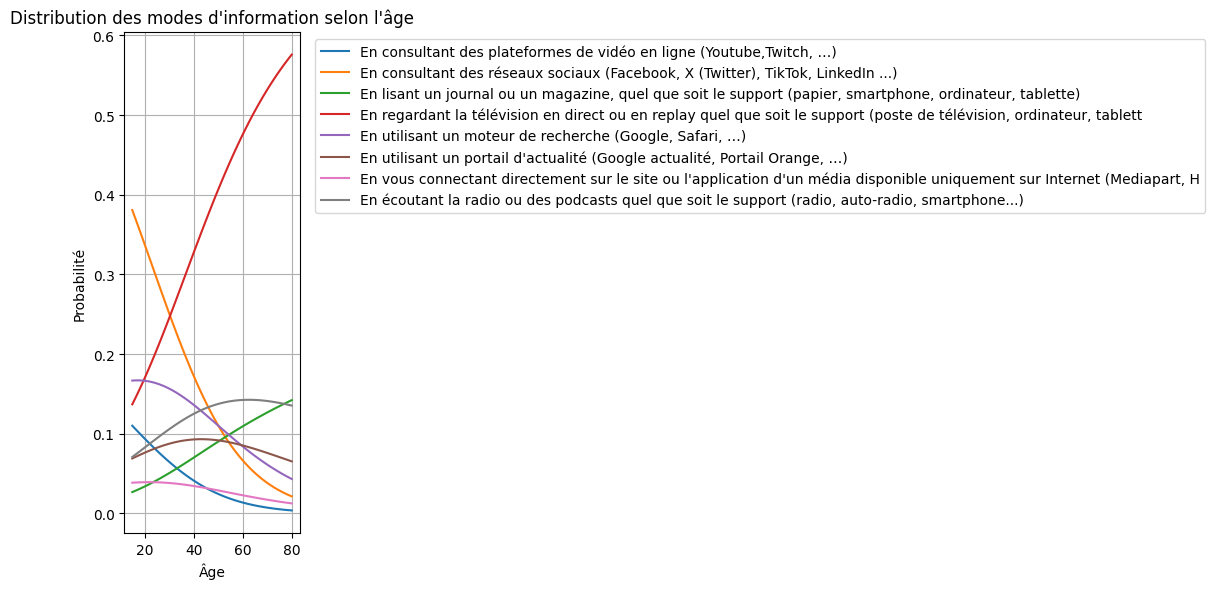

In [9]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt

# Charger et préparer les données
def prepare_data():
    # Lire le CSV avec des paramètres plus permissifs
    df = pd.read_csv('lesfrancaisetlinformationpropre.csv',
                     encoding='utf-8',
                     on_bad_lines='skip',
                     low_memory=False)

    print(f"Nombre de lignes après chargement: {len(df)}")

    # Vérifier les colonnes nécessaires
    print("\nColonnes disponibles:", df.columns.tolist())
    print("\nValeurs uniques dans RS2C_RECODE_AG_R:", df['RS2C_RECODE_AG_R'].unique())
    print("Valeurs uniques dans NEWS1BIS_R:", df['NEWS1BIS_R'].unique())

    # Mapping des tranches d'âge
    age_mapping = {
        '15-17 ans': 16,
        '18-24 ans': 21,
        '25-34 ans': 29.5,
        '35-44 ans': 39.5,
        '45-59 ans': 52,
        '60-69 ans': 64.5,
        '70 ans et +': 75
    }

    # Convertir les tranches d'âge
    df['age_numeric'] = df['RS2C_RECODE_AG_R'].map(age_mapping)
    print(f"\nNombre de lignes après mapping des âges: {len(df)}")

    # Vérifier les valeurs manquantes
    print("\nNombre de valeurs manquantes:")
    print(df[['age_numeric', 'NEWS1BIS_R']].isnull().sum())

    # Supprimer les lignes avec valeurs manquantes
    df = df.dropna(subset=['age_numeric', 'NEWS1BIS_R'])
    print(f"\nNombre de lignes final: {len(df)}")

    if len(df) == 0:
        raise ValueError("Le DataFrame est vide après nettoyage. Vérifiez les données d'entrée.")

    return df


class InfoModePredictor:
    def __init__(self):
        self.le = LabelEncoder()
        self.model = LogisticRegression(multi_class='multinomial', max_iter=1000, random_state=42)

    def fit(self, df):
        """
        Entraîner le modèle sur les données

        Args:
            df (pd.DataFrame): DataFrame contenant les colonnes 'age_numeric' et 'NEWS1BIS_R'
        """
        # Encoder la variable cible
        y = self.le.fit_transform(df['NEWS1BIS_R'])
        X = df[['age_numeric']]

        # Diviser les données
        self.X_train, self.X_test, self.y_train, self.y_test = train_test_split(
            X, y, test_size=0.2, random_state=42
        )

        # Entraîner le modèle
        self.model.fit(self.X_train, self.y_train)

        # Calculer et afficher les métriques de performance
        self.evaluate()

    def evaluate(self):
        """Évaluer le modèle sur l'ensemble de test"""
        y_pred = self.model.predict(self.X_test)
        print("\nRapport de classification :\n")
        print(classification_report(self.y_test, y_pred, target_names=self.le.classes_))

    def predict(self, age):
        """
        Prédire le mode d'information pour un âge donné

        Args:
            age (int): Âge de la personne

        Returns:
            tuple: (mode prédit, probabilités pour chaque mode)
        """
        # Prédire la classe et les probabilités
        age_reshaped = np.array([[age]])
        pred_class = self.model.predict(age_reshaped)
        pred_proba = self.model.predict_proba(age_reshaped)[0]

        # Créer un dictionnaire des probabilités pour chaque mode
        proba_dict = {
            mode: prob
            for mode, prob in zip(self.le.classes_, pred_proba)
        }

        return self.le.inverse_transform(pred_class)[0], proba_dict

    def plot_age_distribution(self):
        """Tracer la distribution des modes d'information par âge"""
        plt.figure(figsize=(12, 6))
        ages = np.linspace(15, 80, 100)
        probas = self.model.predict_proba(ages.reshape(-1, 1))

        for i, mode in enumerate(self.le.classes_):
            plt.plot(ages, probas[:, i], label=mode)

        plt.xlabel('Âge')
        plt.ylabel('Probabilité')
        plt.title('Distribution des modes d\'information selon l\'âge')
        plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
        plt.grid(True)
        plt.tight_layout()
        plt.show()

# Exemple d'utilisation
if __name__ == "__main__":
    # Préparer les données
    df = prepare_data()

    # Créer et entraîner le modèle
    predictor = InfoModePredictor()
    predictor.fit(df)

    # Exemple de prédiction
    test_ages = [16, 25, 40, 55, 70]

    print("\nExemples de prédictions :")
    for age in test_ages:
        mode, probas = predictor.predict(age)
        print(f"\nPour une personne de {age} ans:")
        print(f"Mode principal prédit : {mode}")
        print("Probabilités par mode :")
        for mode, prob in sorted(probas.items(), key=lambda x: x[1], reverse=True):
            print(f"- {mode}: {prob:.1%}")

    # Tracer la distribution
    predictor.plot_age_distribution()

In [ ]:
try:
    df = prepare_data()
except Exception as e:
    print(f"Erreur lors de la préparation des données: {e}")

Nombre de lignes après chargement: 1954

Colonnes disponibles: ['Unnamed: 0', 'RECORD', 'UUID', 'CIBLE', 'SOURCE_BASE_R1', 'POIDS03', 'INTER', 'CONTACT', 'RS1_R', 'RS2C_RECODE_AG_R', 'RS3_R', 'RS4_R', 'CSPIND_R', 'RS5_R', 'UDA9_R', 'UDA5_R', 'DPT_DOM_R', 'CC_R', 'RS7_R', 'RS14_R', 'ILLECTRO_R', 'RS15_R', 'FREQ_INTERNET_R', 'RS16_R_1', 'RS16_R_2', 'RS16_R_3', 'RS16_R_4', 'RS16_R_5', 'RS16_R_6', 'RS16_R_7', 'RS16_R_8', 'RS16_R_9', 'RS16_R_10', 'RS16_R_11', 'RS16_R_12', 'INT1_R', 'INT2_R_1', 'INT2_R_2', 'INT2_R_3', 'INT2_R_4', 'INT2_R_5', 'INT2_R_6', 'INT2_R_7', 'INT2_R_8', 'INT2_R_9', 'INT2_R_10', 'INT2_R_11', 'INT2_R_12', 'VERSION_QUESTIO_R', 'INT3_R_1', 'INT3_R_2', 'INT3_R_3', 'INT3_R_4', 'INT3_R_5', 'INT3_R_6', 'INT3_R_7', 'INT3_R_8', 'INT3_R_9', 'INT3_R_10', 'INT3_R_11', 'INT3_R_12', 'MOTIV_R_1', 'MOTIV_R_2', 'MOTIV_R_3', 'MOTIV_R_4', 'MOTIV_R_5', 'MOTIV_R_6', 'MOTIV_R_7', 'MOTIV_R_8', 'MOTIV_R_9', 'MOTIV_R_10', 'MOTIV_R_11', 'MOTIV_R_12', 'MOTIV_R_13', 'MOTIV_R_14', 'NEWS1_R_1', 'NE

Nombre total d'observations: 3298


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning:

'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.




Rapport de classification :
                                                                                                                         precision    recall  f1-score   support

                                                    En consultant des plateformes de vidéo en ligne (Youtube,Twitch, …)       0.00      0.00      0.00        22
                                        En consultant des réseaux sociaux (Facebook, X (Twitter), TikTok, LinkedIn ...)       0.23      0.49      0.32        80
               En lisant un journal ou un magazine, quel que soit le support (papier, smartphone, ordinateur, tablette)       0.00      0.00      0.00        57
   En regardant la télévision en direct ou en replay quel que soit le support (poste de télévision, ordinateur, tablett       0.44      0.86      0.58       252
                                                                En utilisant un moteur de recherche (Google, Safari, …)       0.00      0.00      0.00        83
    

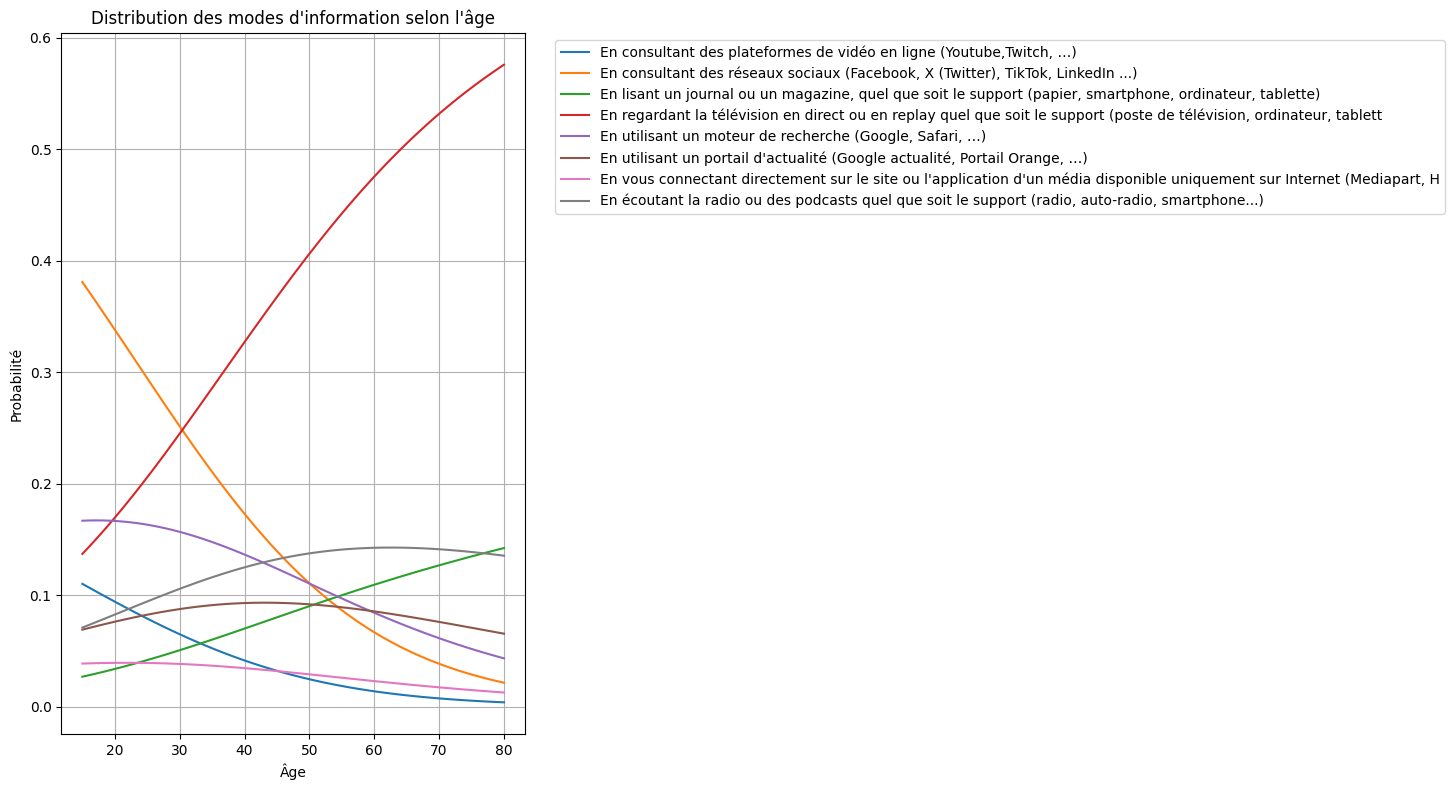

In [11]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt

def prepare_data():
    # Lire le CSV filtré
    df = pd.read_csv('filtered_age_group_and_main_info_mode.csv')

    # Mapping des tranches d'âge vers des valeurs numériques
    age_mapping = {
        '15-17 ans': 16,
        '18-24 ans': 21,
        '25-34 ans': 29.5,
        '35-44 ans': 39.5,
        '45-59 ans': 52,
        '60-69 ans': 64.5,
        '70 ans et +': 75
    }

    # Convertir les tranches d'âge en valeurs numériques
    df['age_numeric'] = df['RS2C_RECODE_AG_R'].map(age_mapping)

    # Supprimer les lignes avec des valeurs manquantes si nécessaire
    df = df.dropna(subset=['age_numeric', 'NEWS1BIS_R'])

    print(f"Nombre total d'observations: {len(df)}")
    return df

class InfoModePredictor:
    def __init__(self):
        self.le = LabelEncoder()
        self.model = LogisticRegression(multi_class='multinomial', max_iter=1000, random_state=42)

    def fit(self, df):
        """
        Entraîner le modèle sur les données
        """
        # Encoder la variable cible
        y = self.le.fit_transform(df['NEWS1BIS_R'])
        X = df[['age_numeric']].values

        # Diviser les données
        X_train, X_test, y_train, y_test = train_test_split(
            X, y, test_size=0.2, random_state=42, shuffle=True
        )

        # Entraîner le modèle
        self.model.fit(X_train, y_train)

        # Évaluer le modèle
        y_pred = self.model.predict(X_test)
        print("\nRapport de classification :")
        print(classification_report(y_test, y_pred, target_names=self.le.classes_, zero_division=0))

        # Calculer et afficher les proportions de chaque mode par tranche d'âge
        age_groups = df['RS2C_RECODE_AG_R'].unique()
        print("\nDistribution des modes d'information par tranche d'âge:")
        for age_group in sorted(age_groups):
            print(f"\n{age_group}:")
            group_dist = df[df['RS2C_RECODE_AG_R'] == age_group]['NEWS1BIS_R'].value_counts(normalize=True)
            for mode, prop in group_dist.items():
                print(f"  {mode}: {prop:.1%}")

    def predict(self, age):
        """
        Prédire le mode d'information pour un âge donné
        """
        age_array = np.array([[age]])
        pred_class = self.model.predict(age_array)
        pred_proba = self.model.predict_proba(age_array)[0]

        proba_dict = {
            mode: prob
            for mode, prob in zip(self.le.classes_, pred_proba)
        }

        return self.le.inverse_transform(pred_class)[0], proba_dict

    def plot_age_distribution(self):
        """Tracer la distribution des modes d'information par âge"""
        plt.figure(figsize=(15, 8))
        ages = np.linspace(15, 80, 100).reshape(-1, 1)
        probas = self.model.predict_proba(ages)

        for i, mode in enumerate(self.le.classes_):
            plt.plot(ages, probas[:, i], label=mode)

        plt.xlabel('Âge')
        plt.ylabel('Probabilité')
        plt.title('Distribution des modes d\'information selon l\'âge')
        plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
        plt.grid(True)
        plt.tight_layout()
        plt.show()

# Test du modèle
if __name__ == "__main__":
    # Préparer les données
    df = prepare_data()

    # Créer et entraîner le modèle
    predictor = InfoModePredictor()
    predictor.fit(df)

    # Exemple de prédictions
    test_ages = [16, 25, 40, 55, 70]
    print("\nExemples de prédictions :")
    for age in test_ages:
        mode, probas = predictor.predict(age)
        print(f"\nPour une personne de {age} ans:")
        print(f"Mode principal prédit : {mode}")
        print("Probabilités par mode :")
        for mode, prob in sorted(probas.items(), key=lambda x: x[1], reverse=True):
            print(f"- {mode}: {prob:.1%}")

    # Afficher la distribution
    predictor.plot_age_distribution()

<IPython.core.display.Javascript object>

In [9]:
#Pour que les fréquences totalisent 1 :

# On doit sommer les fréquences pour toutes les combinaisons RSINFO_2_LR_R_2 et RSINFO_2_LR_R_4 (Instagram/Facebook)
# au sein d'une même paire Tranche d'âge + Longueur de vidéo préférée.

SyntaxError: invalid syntax (<ipython-input-9-409ce5c6514b>, line 1)

In [2]:
import pandas as pd

# Lire le fichier
df = pd.read_csv('lesfrancaisetlinformationpropre.csv')

# Compter les valeurs non-nulles
tiktok_count = df['RSINFO_2_LR_R_4'].notna().sum()
instagram_count = df['RSINFO_2_LR_R_2'].notna().sum()

print(f"Nombre de valeurs non vides dans TikTok (RSINFO_2_LR_R_4): {tiktok_count}")
print(f"Nombre de valeurs non vides dans Instagram (RSINFO_2_LR_R_2): {instagram_count}")

# Voir la répartition des valeurs
print("\nRépartition des valeurs pour TikTok:")
print(df['RSINFO_2_LR_R_4'].value_counts())

print("\nRépartition des valeurs pour Instagram:")
print(df['RSINFO_2_LR_R_2'].value_counts())

Nombre de valeurs non vides dans TikTok (RSINFO_2_LR_R_4): 804
Nombre de valeurs non vides dans Instagram (RSINFO_2_LR_R_2): 1501

Répartition des valeurs pour TikTok:
RSINFO_2_LR_R_4
Oui    447
Non    357
Name: count, dtype: int64

Répartition des valeurs pour Instagram:
RSINFO_2_LR_R_2
Oui    758
Non    743
Name: count, dtype: int64


<ipython-input-2-978075a4a508>:4: DtypeWarning: Columns (16,20,104,105,111,112,113,120,121,128,129,136,137,145,152,153,234,264,265,279,280,281,282,296,305,316,317,318,330,342,343,344) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('lesfrancaisetlinformationpropre.csv')


In [14]:
import pandas as pd
import plotly.graph_objects as go
from dash import Dash, dcc, html, Input, Output

# Création de l'application Dash
app = Dash(__name__)

# Lecture des données
df = pd.read_csv('social_media_frequencies.csv')

# Préparation des options pour les menus déroulants
age_options = [{'label': 'Toutes les tranches d\'âge', 'value': 'all'}] + [
    {'label': age, 'value': age} for age in sorted(df['RS2C_RECODE_AG_R'].unique())
]

format_options = [{'label': 'Tous les formats', 'value': 'all'}] + [
    {'label': format.replace('D\'un format ', ''), 'value': format}
    for format in sorted(df['FORMAT3_LR3_FORMAT3_3_R'].unique())
]

# Layout de l'application
app.layout = html.Div([
    html.H1('Utilisation des réseaux sociaux par âge et format vidéo préféré',
            style={'textAlign': 'center', 'padding': '20px'}),

    html.Div([
        # Bouton pour basculer entre Instagram et TikTok
        html.Button(
            'Changer de réseau social',
            id='social-toggle',
            n_clicks=0,
            style={'margin': '10px', 'padding': '10px'}
        ),

        # Sélection de la tranche d'âge
        html.Div([
            html.Label('Tranche d\'âge:'),
            dcc.Dropdown(
                id='age-select',
                options=age_options,
                value='all',
                style={'width': '200px'}
            )
        ], style={'margin': '10px'}),

        # Sélection du format
        html.Div([
            html.Label('Format vidéo:'),
            dcc.Dropdown(
                id='format-select',
                options=format_options,
                value='all',
                style={'width': '200px'}
            )
        ], style={'margin': '10px'})
    ], style={'display': 'flex', 'justifyContent': 'center', 'alignItems': 'center'}),

    # Graphique
    dcc.Graph(id='usage-graph'),

    # Texte explicatif
    html.Div(
        "* Les pourcentages sont calculés pour chaque combinaison âge/format",
        style={'textAlign': 'center', 'padding': '10px', 'fontStyle': 'italic'}
    )
])

@app.callback(
    [Output('usage-graph', 'figure'),
     Output('social-toggle', 'children')],
    [Input('age-select', 'value'),
     Input('format-select', 'value'),
     Input('social-toggle', 'n_clicks')]
)
def update_graph(selected_age, selected_format, n_clicks):
    # Déterminer quel réseau social afficher
    display_mode = 'instagram' if n_clicks % 2 == 0 else 'tiktok'
    button_text = 'Voir TikTok' if display_mode == 'instagram' else 'Voir Instagram'

    # Filtrer les données
    filtered_df = df.copy()
    if selected_age != 'all':
        filtered_df = filtered_df[filtered_df['RS2C_RECODE_AG_R'] == selected_age]
    if selected_format != 'all':
        filtered_df = filtered_df[filtered_df['FORMAT3_LR3_FORMAT3_3_R'] == selected_format]

    # Préparer les données pour le graphique
    social_column = 'RSINFO_2_LR_R_2' if display_mode == 'instagram' else 'RSINFO_2_LR_R_4'
    group_columns = ['RS2C_RECODE_AG_R', 'FORMAT3_LR3_FORMAT3_3_R']

    # Calculer les pourcentages d'utilisation
    def calculate_percentages(group):
        total = group['Frequency'].sum()
        uses = group[group[social_column] == 'Oui']['Frequency'].sum()
        not_uses = group[group[social_column] == 'Non']['Frequency'].sum()
        return pd.Series({
            'Utilise': (uses * 100),
            'N\'utilise pas': (not_uses * 100)
        })

    results = filtered_df.groupby(group_columns).apply(calculate_percentages).reset_index()

    # Créer le graphique
    fig = go.Figure()

    x_values = results['FORMAT3_LR3_FORMAT3_3_R'] if selected_age != 'all' else results['RS2C_RECODE_AG_R']
    x_values = [x.replace('D\'un format ', '') for x in x_values]

    fig.add_trace(go.Bar(
        x=x_values,
        y=results['Utilise'],
        name=f'Utilise {display_mode.capitalize()}',
        marker_color='#82ca9d'
    ))

    fig.add_trace(go.Bar(
        x=x_values,
        y=results['N\'utilise pas'],
        name=f'N\'utilise pas {display_mode.capitalize()}',
        marker_color='#ff8042'
    ))

    # Mise en forme du graphique
    fig.update_layout(
        barmode='stack',
        title={
            'text': f'Utilisation de {display_mode.capitalize()} par ' +
                   ('format' if selected_age != 'all' else 'tranche d\'âge'),
            'x': 0.5,
            'xanchor': 'center'
        },
        xaxis_title='Format vidéo' if selected_age != 'all' else 'Tranche d\'âge',
        yaxis_title='Pourcentage (%)',
        yaxis_range=[0, 100],
        xaxis_tickangle=-45,
        showlegend=True,
        legend=dict(
            yanchor="top",
            y=0.99,
            xanchor="left",
            x=0.01
        ),
        margin=dict(b=100)  # Marge en bas pour les étiquettes inclinées
    )

    return fig, button_text

if __name__ == '__main__':
    app.run_server(debug=True)

<IPython.core.display.Javascript object>